In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
%matplotlib inline

In [14]:
auto = pd.read_csv("Automobile_data.csv")
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [15]:
temp = auto.head()
temp

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


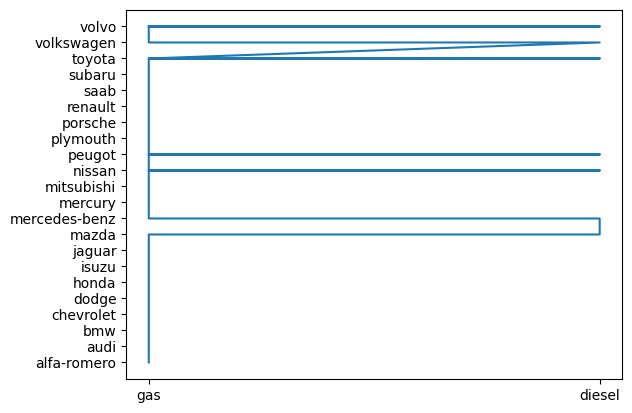

In [16]:
plt.plot(auto["fuel-type"], auto ["make"])
plt.show()

In [17]:
brandVSfuel = auto.groupby(["make","fuel-type"]).size().unstack(fill_value = 0)
brandVSfuel

fuel-type,diesel,gas
make,,
alfa-romero,0,3
audi,0,7
bmw,0,8
chevrolet,0,3
dodge,0,9
honda,0,13
isuzu,0,4
jaguar,0,3
mazda,2,15


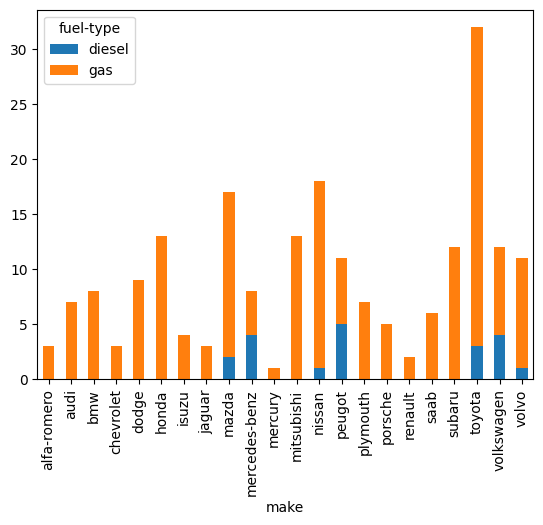

In [18]:
brandVSfuel.plot(kind = "bar",stacked = True)
plt.show()

In [19]:
brandVSdoor = auto.groupby(["make","num-of-doors"]).size().unstack(fill_value = 0)
brandVSdoor

num-of-doors,?,four,two
make,,,
alfa-romero,0,0,3
audi,0,5,2
bmw,0,5,3
chevrolet,0,1,2
dodge,1,4,4
honda,0,5,8
isuzu,0,2,2
jaguar,0,2,1
mazda,1,7,9


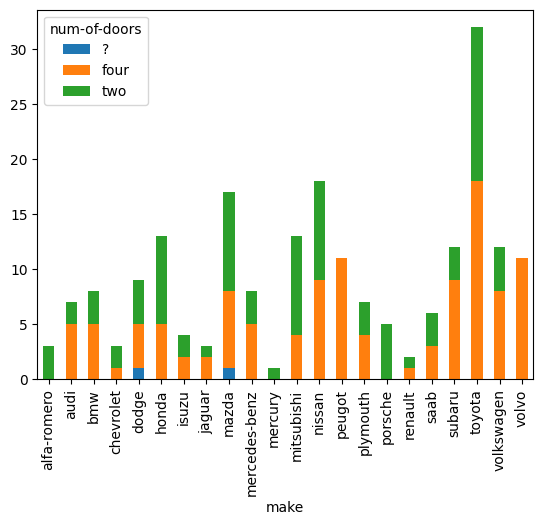

In [20]:
brandVSdoor.plot(kind = "bar",stacked = True)
plt.show()

In [21]:
def prices(p):
    if p == '?':
        return "Invalid price"
    p=int(p)
    if p > 0 and p <= 10000:
        return "Low Budget Car"
    elif p >= 10000 and p <= 20000:
        return "Mid range Budget Car"
    elif p >= 20000 and p <= 30000:
        return "Luxury Car"
    elif p > 30000: 
        return "Super Luxury Car"
    else:
        return "Invalid"
auto["type"] = auto["price"].apply(prices)
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,type
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Mid range Budget Car
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Mid range Budget Car
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Mid range Budget Car
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,Mid range Budget Car
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,Mid range Budget Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,Mid range Budget Car
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,Mid range Budget Car
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,Luxury Car
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.4,23.0,106,4800,26,27,22470,Luxury Car


In [22]:
gg = auto.groupby(["make","type"]).size().unstack(fill_value = 0)
gg

type,Invalid price,Low Budget Car,Luxury Car,Mid range Budget Car,Super Luxury Car
make,,,,,
alfa-romero,0,0,0,3,0
audi,1,0,1,5,0
bmw,0,0,3,2,3
chevrolet,0,3,0,0,0
dodge,0,8,0,1,0
honda,0,10,0,3,0
isuzu,2,1,0,1,0
jaguar,0,0,0,0,3
mazda,0,7,0,10,0


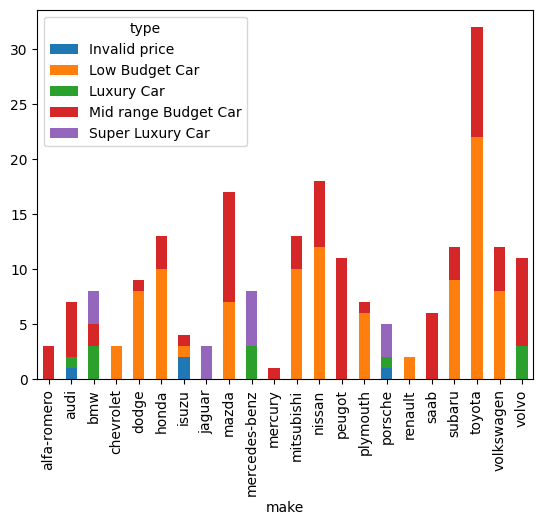

In [23]:
gg.plot(kind = "bar",stacked = True)
plt.show()

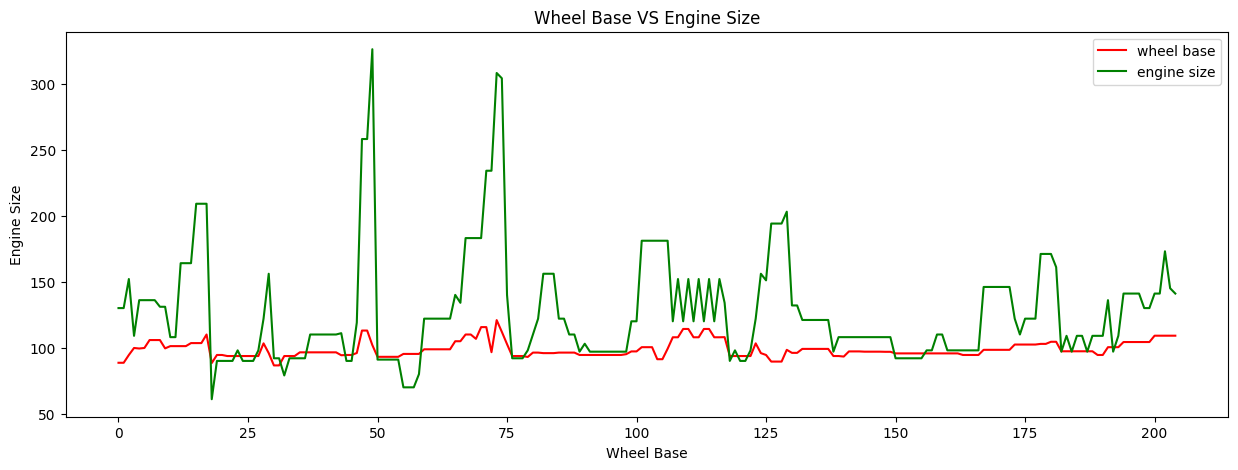

In [32]:
plt.figure(figsize= (15,5))
sns.lineplot(data = auto["wheel-base"], linewidth=1.5,label="wheel base",color='r')
sns.lineplot(data = auto["engine-size"], linewidth=1.5,label="engine size",color='g')

plt.title("Wheel Base VS Engine Size")
plt.xlabel("Wheel Base")
plt.ylabel("Engine Size")

plt.show()

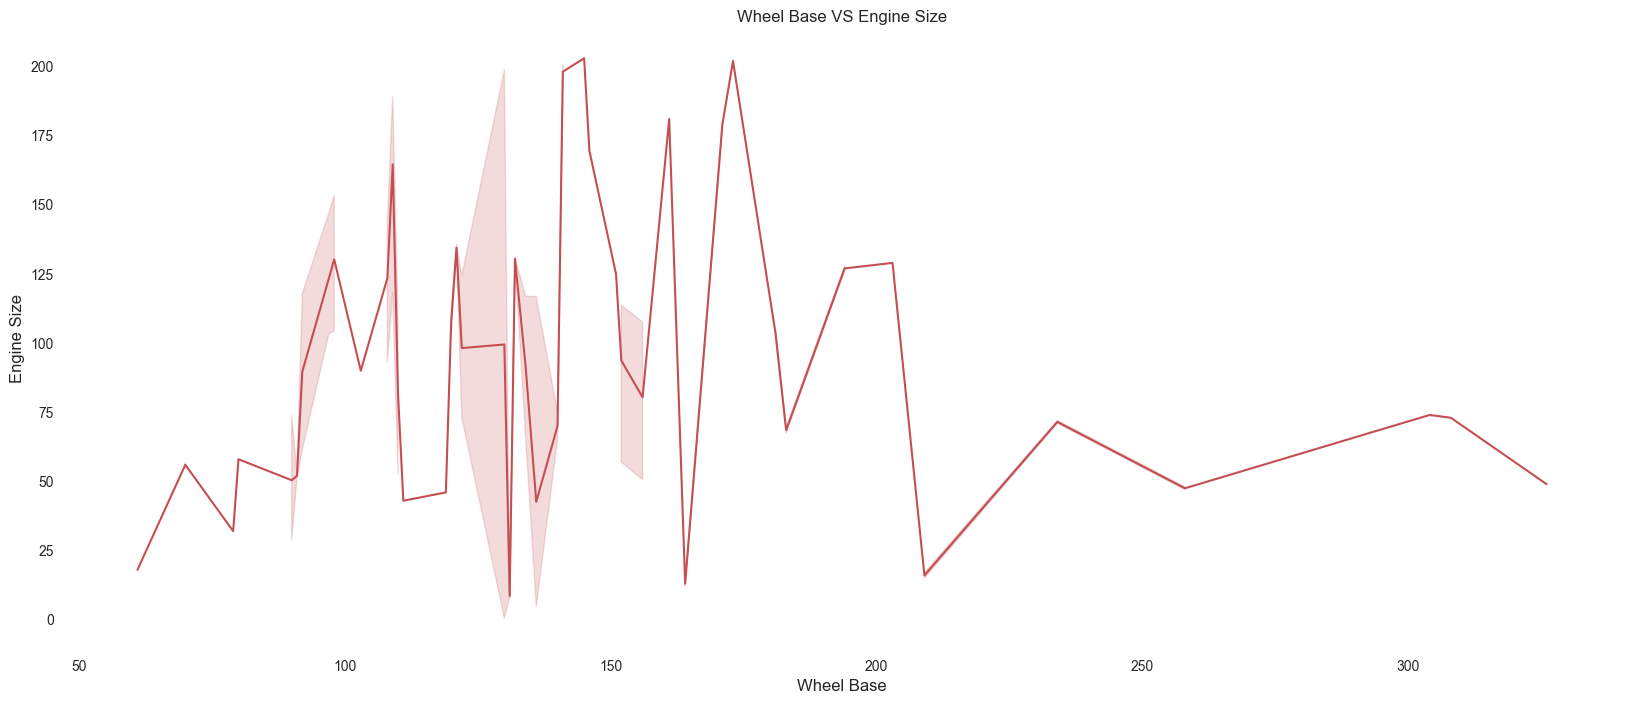

In [45]:
plt.figure(figsize = (20,8))
sns.set(rc={"axes.facecolor":"#FFFFFF", "axes.grid": False, "xtick.labelsize":10, "ytick.labelsize":10})
plt.title("Wheel Base VS Engine Size")
plt.xlabel("Wheel Base")
plt.ylabel("Engine Size")

sns.lineplot(x = auto["engine-size"], y = auto["wheel-base"].index.values,color = 'r')
plt.show()